In [1]:
import pandas as pd
import numpy as np
import datetime 
import math
from matplotlib import pyplot as plt

In [2]:
%cd ..

c:\Users\Frank\OneDrive\Documents\git\delta_test_bnc


In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
from bnc_tms import tms

In [5]:
#Dummy dates
ndays = int(60 * 7/5)
base = datetime.date.today()
dates = [base - datetime.timedelta(days = n) for n in range(ndays)]
dates = np.array([x for x in dates if x.weekday() not in [5,6]])

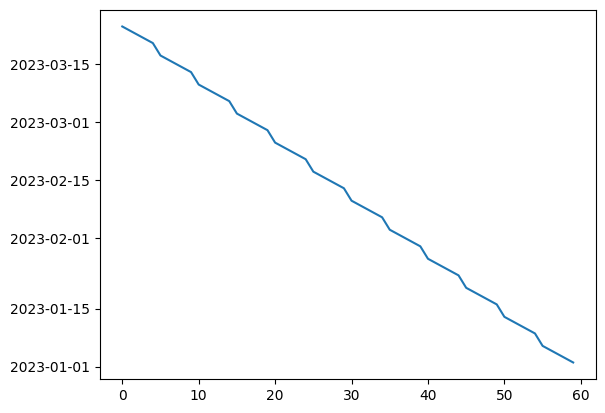

In [6]:
plt.plot(dates)

In [7]:
#Dummy volume
vol = 10000
nrows = np.array([int(vol * (2 + math.sin(i * 2*math.pi/5))) for i in range(ndays)])

sdev = int(vol/50)
nrows = nrows + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])
nrows = vol + nrows - min(nrows)

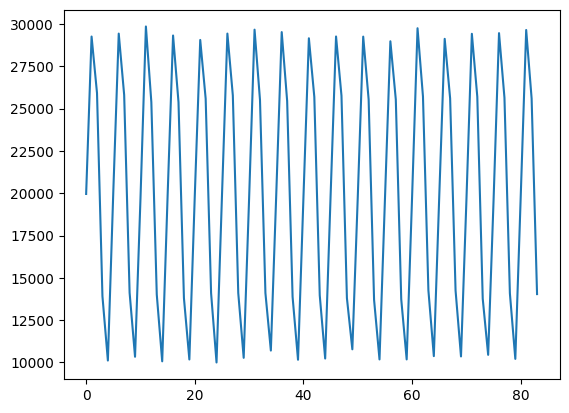

In [8]:
plt.plot(nrows)

In [9]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [10]:
tms_model = tms.timeseries_model(df, 0.05)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 1.0
***
Daily trend: -0.9311
Sinusoidal term: -4.9534
Lag term: 1.0014
Lag (days): 7.0
***
Test alpha: 0.05
Observed volume: 19956.0
Expected volume: 20096.7366
0.95 CI: (19653.4307, 20540.0425)
p-value: 0.5338
Result: PASS
------------------------------------------


In [11]:
#Dummy volume
vol = 10000
nrows = np.array([int(vol * (2 + math.sin(i * 2*math.pi/5))) for i in range(ndays)])

sdev = int(vol/5)
nrows = nrows + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])
nrows = vol + nrows - min(nrows)

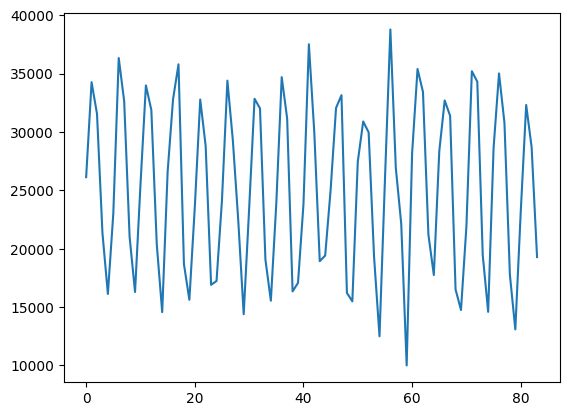

In [12]:
plt.plot(nrows)

In [13]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [14]:
tms_model = tms.timeseries_model(df, 0.05)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 0.89
***
Daily trend: -1.2451
Sinusoidal term: 445.7205
Lag term: 0.8977
Lag (days): 7.0
***
Test alpha: 0.05
Observed volume: 26127.0
Expected volume: 22871.5013
0.95 CI: (19023.2632, 26719.7395)
p-value: 0.0973
Result: PASS
------------------------------------------
